In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, metrics, linear_model
%matplotlib inline

# Linear Regression

Lets say have some features $\vec{X}=[x_{1},x_{2}...x_{n}]$ that describe different characteristics of a house (e.g. $x_{1}$ might represent the total square footage of the home, while $x_{2}$ might describe the crime rate in the neighborhood). We might reasonably think the features $\vec{X}$ could tell us something about the value, y, of the home.

If we had some data recording the characteristics $\vec{X}$ of different homes sold in the past and y the price the homes sold for, we might be able to create a generalizable hypothesis function h($\vec{X}$) that could predict the market value of a home given it's characteristics.

In Linear Regression we assume this hypothesis function is ... linear h($\vec{X})=\sum_{i=1}^{n} x_{i} \cdot w_{i} $ where the weights $\vec{w}$ describe the relative importance of each feature. The features of the house and it's sale price are not arbitrary, they are fixed, but we can arbitrarily change $\vec{w}$ to find the optimal values that will make our hypothesis function a useful predictor of market value.


### But what do we mean by optimal?
Good question! That is entirely up to us! Supervised ML approaches attempt to find the $\vec{w}$ that will minimize some kind of loss (a.k.a. error or cost) function that we define for it. Because we are interested in finding h($\vec{w}|\vec{X}) \simeq y$ it makes sense for us to minimize the difference between h($\vec{w}|\vec{X})$ and y. So for this example we will use the loss function $J(w) = \sum ( h(\vec{w}|\vec{X}) - y)^{2}$. (see below).

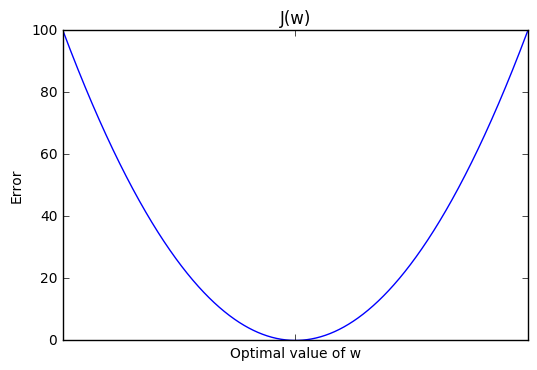

In [2]:
x=np.linspace(-10,10,1000)
plt.plot(x,x**2)
plt.ylabel('Error');plt.xticks([0],['Optimal value of w']); plt.title('J(w)')
plt.show()

The optimal values $\vec{w}$ for our loss function are found where $\frac{dJ(w_{i})}{dw_{i}} = 0$. 


### What about over fitting?
Our error function will continually get better as we add features, even if those features are completely unrelated to the market value of the home. The more features we add the more degrees of freedom we have to fit the the data.   

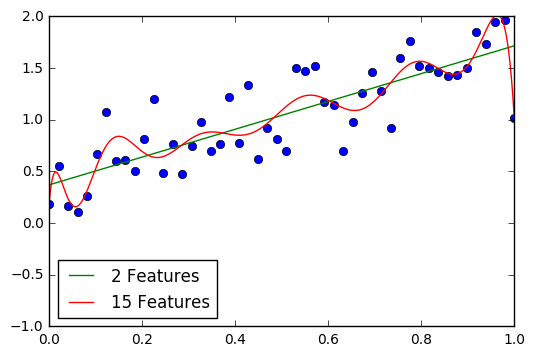

In [3]:
x_line=np.linspace(0,1,1000)
x=np.linspace(0,1,50)
y=x+np.random.random_sample(size=50)
plt.plot(x,y,'o')

p1 = np.polyfit(x,y,1)
plt.plot(x_line, np.polyval(p1, x_line),label='2 Features') 

p22 = np.polyfit(x,y,15)
plt.plot(x_line, np.polyval(p22, x_line), label='15 Features')
plt.ylim([-1,2]); plt.legend(loc=3)
plt.show()

To combat over fitting we must use regularization in our cost function! There are two common kinds of regularization known as Lasso or (L1) and Ridge or (L2) that penalize our cost function.

Cost function with Lasso regularization:
$ J(w) = (\sum (x_{i} \cdot w_{i}) - y)^{2} + \alpha\cdot\sum |w_{i}|$   

Cost function with Ridge regularization:
$ J(w) = (\sum (x_{i} \cdot w_{i}) - y)^{2} + \alpha\cdot\sum w_{i}^{2}$  

These regularization terms penalize our model for becoming more complex. The scaling term $\alpha$ is known as a hyperparameter. Hyperparameter optimization is a central component of machine learning. Unfortunately there is no empirical procedure that can be preformed to optimize these terms. It is up to you as the scientist to pick the hyperparameter values that optimally weighs the risks of over/under fitting your data.  

## Load in your dataset

In [4]:
from sklearn.datasets import load_boston
dataset = load_boston()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8)

### Lets Try using a Ridge Regessor with sklearn 

In [8]:
#First create a ridge regression object
ridge = skl.linear_model.Ridge(alpha=1.0)

#Fit that to the training data
ridge.fit(X_train, y_train)

#Get the R^2
R2_test  = ridge.score(X_train,y_train) 
R2_train = ridge.score(X_test,y_test)

print('R^2 train: %.3f\nR^2 test : %.3f'%(R2_train,R2_test))

R^2 train: 0.735
R^2 test : 0.737


In [9]:
gs = skl.model_selection.GridSearchCV(ridge,param_grid={'alpha':[0,.001,.01,.1,1,10,100,1000]})
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [10]:
gs.score(X_test,y_test)

0.73578929114070646

In [11]:
gs.grid_scores_

/usr/local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.70644, std: 0.04204, params: {'alpha': 0},
 mean: 0.70645, std: 0.04205, params: {'alpha': 0.001},
 mean: 0.70650, std: 0.04208, params: {'alpha': 0.01},
 mean: 0.70676, std: 0.04239, params: {'alpha': 0.1},
 mean: 0.70441, std: 0.04427, params: {'alpha': 1},
 mean: 0.69900, std: 0.04181, params: {'alpha': 10},
 mean: 0.68208, std: 0.03245, params: {'alpha': 100},
 mean: 0.62165, std: 0.03456, params: {'alpha': 1000}]

### Can you do better than this? Time to think about preprocessing your data and feature engineering.

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing